In [28]:
import pandas as pd
import numpy as np 
from typing import List
from typing import Tuple
import seaborn as sns
import matplotlib as plt

In [29]:
diamond_price = ('diamonds.csv')
diamond_df = pd.read_csv(diamond_price)
diamond_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [30]:
def clean_data(data_frame):
    number_columns=["carat", "depth", "table", "x", "y", "z"]
    catagory_columns=["cut", "color", "clarity"]


    
    for col in number_columns:
        data_frame[col] = data_frame[col].fillna(data_frame[col].median())
    
    df = pd.get_dummies(data_frame, columns=catagory_columns, drop_first=True)

    df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

    df = df.astype(int)
    
    return df

In [31]:
diamond_df_sorted=clean_data(diamond_df)
diamond_df_sorted.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0,61,55,326,3,3,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0,59,61,326,3,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,56,65,327,4,4,2,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,62,58,334,4,4,2,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0,63,58,335,4,4,2,1,0,...,0,0,1,0,0,1,0,0,0,0


<Axes: >

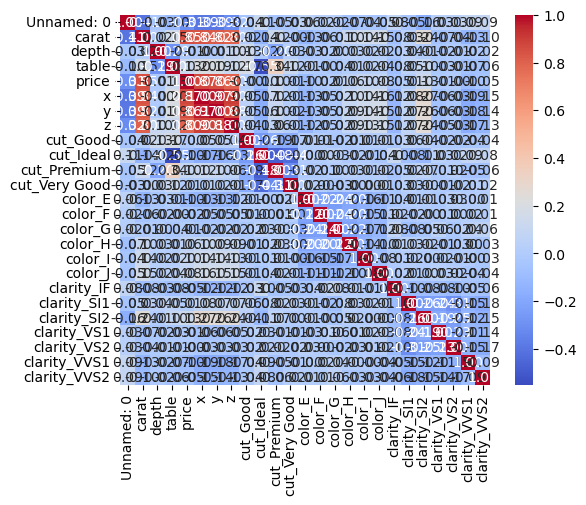

In [32]:
corr = diamond_df_sorted.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

In [33]:
diamond_df_sorted.to_csv("diamond_sorted.csv", index= False)